<a href="https://colab.research.google.com/github/nickplas/Intro_to_ML_24-25/blob/main/challenges/challenge-one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1: The banknote-authentication data set problem

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive.ics.uci.edu/dataset/267/banknote+authentication

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

### 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

In [ ]:
import os  
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

from numpy import linalg as LA  
from tqdm import tqdm  
from scipy.spatial.distance import cdist, euclidean, minkowski  

from sklearn import preprocessing  
from sklearn.decomposition import PCA  
from sklearn.manifold import TSNE  
from sklearn.cluster import KMeans, DBSCAN  
from sklearn.neighbors import NearestNeighbors  
from sklearn.linear_model import LinearRegression, LogisticRegression  
from sklearn.model_selection import KFold, train_test_split  
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    ConfusionMatrixDisplay, normalized_mutual_info_score
)

C:\Users\mutua\AppData\Local\Temp\ipykernel_5260\138101163.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [24]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 


In [29]:
# metadata 
banknote_authentication

{'data': {'ids': None,
  'features':       variance  skewness  curtosis  entropy
  0      3.62160   8.66610   -2.8073 -0.44699
  1      4.54590   8.16740   -2.4586 -1.46210
  2      3.86600  -2.63830    1.9242  0.10645
  3      3.45660   9.52280   -4.0112 -3.59440
  4      0.32924  -4.45520    4.5718 -0.98880
  ...        ...       ...       ...      ...
  1367   0.40614   1.34920   -1.4501 -0.55949
  1368  -1.38870  -4.87730    6.4774  0.34179
  1369  -3.75030 -13.45860   17.5932 -2.77710
  1370  -3.56370  -8.38270   12.3930 -1.28230
  1371  -2.54190  -0.65804    2.6842  1.19520
  
  [1372 rows x 4 columns],
  'targets':       class
  0         0
  1         0
  2         0
  3         0
  4         0
  ...     ...
  1367      1
  1368      1
  1369      1
  1370      1
  1371      1
  
  [1372 rows x 1 columns],
  'original':       variance  skewness  curtosis  entropy  class
  0      3.62160   8.66610   -2.8073 -0.44699      0
  1      4.54590   8.16740   -2.4586 -1.46210      0
  2

In [4]:
# construct the datafram
data = banknote_authentication["data"]["features"]
data["targets"] = banknote_authentication["data"]["targets"]
data

,variance,skewness,curtosis,entropy,targets
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
   variance  skewness  curtosis  entropy  targets
0   3.62160    8.6661   -2.8073 -0.44699        0
1   4.54590    8.1674   -2.4586 -1.46210        0
2   3.86600   -2.6383    1.9242  0.10645        0
3   3.45660    9.5228   -4.0112 -3.59440        0
4   0.32924   -4.4552    4.5718 -0.98880        0


In [6]:
X = data.iloc[:,:-1].values
var_class = data.iloc[:,4].values
N = X.shape[0]
nc = X.shape[1]

In [7]:
# No need for this as the labels are already encoded into int
ord_encoder = preprocessing.OrdinalEncoder()
ord_encoder.fit(var_class.reshape(-1,1))
y_scaled = ord_encoder.transform(var_class.reshape(-1,1))
y_range_change = y_scaled * 2 - 1
y_range_change

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

In [8]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

### 2. Unsupervised Learning

Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

#### PCA

In [9]:
# Performing Principal Component Analysis (PCA) using sklearn
pca = PCA()

# Fitting the PCA model to the scaled data
pca.fit(X_scaled)

# Transforming the original data to the principal components
projection = pca.transform(X_scaled)

# Calculating the cumulative explained variance ratio
cumulative_variance = np.zeros(nc)
for i in range(nc):
    cumulative_variance[i] = np.sum(pca.explained_variance_ratio_[:i+1])

# Extracting eigenvalues and component indices
eigenvector = pca.components_
eigenvalues = pca.explained_variance_
components = np.arange(nc) + 1

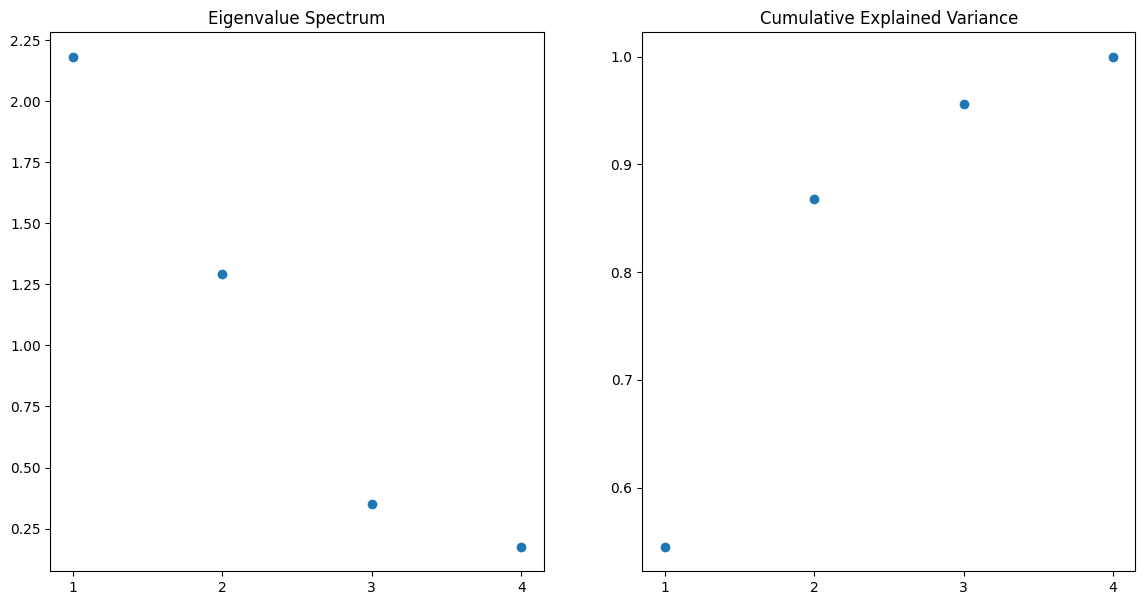

In [10]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 7))

ax1.set_title('Eigenvalue Spectrum')
ax1.scatter(components, eigenvalues)
ax1.set_xticks(components)

ax2.set_title('Cumulative Explained Variance')
ax2.scatter(components, cumulative_variance)
ax2.set_xticks(components)

plt.show()

In [11]:
# This code determines the minimum number of principal components needed to 
# capture a given percentage of the total variance.
for threshold in [0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 0.999]:
    num_components = np.argmax(cumulative_variance - threshold > 0.) + 1

    print(f"Explained Variance Threshold: {threshold}, Number of Components: {num_components}")

Explained Variance Threshold: 0.8, Number of Components: 2
Explained Variance Threshold: 0.85, Number of Components: 2
Explained Variance Threshold: 0.9, Number of Components: 3
Explained Variance Threshold: 0.95, Number of Components: 3
Explained Variance Threshold: 0.97, Number of Components: 4
Explained Variance Threshold: 0.99, Number of Components: 4
Explained Variance Threshold: 0.999, Number of Components: 4


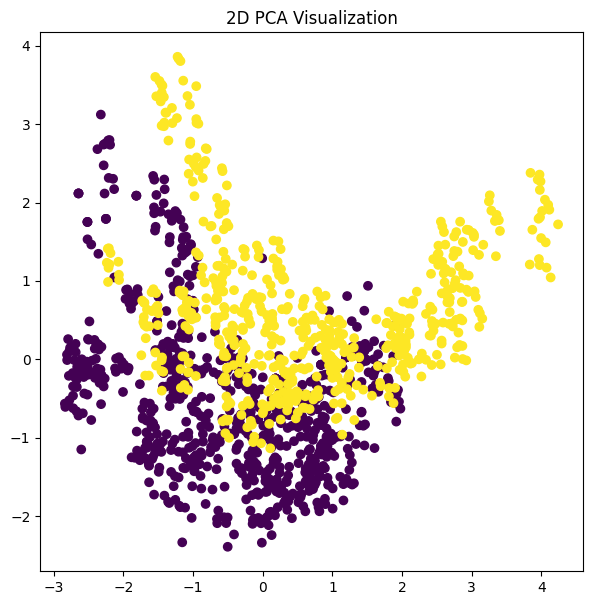

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(projection[:, 0], projection[:, 1], c=y_range_change)
ax.set_title('2D PCA Visualization')
plt.show()

#### K-means

In [13]:
# Compute the pairwise Euclidean distance matrix between unique rows of the scaled dataset
unique_scaled_data = np.unique(X_scaled, axis=0)
distance_matrix = cdist(unique_scaled_data, unique_scaled_data)
distance_matrix.sort(axis=1)

# Calculate the ratio of the second-nearest neighbor distance to the nearest neighbor distance
mu_i = np.divide(distance_matrix[:, 2], distance_matrix[:, 1])

# Compute the logarithm of the calculated ratios
log_mu_i = np.log(mu_i)

# Calculate the inverse of the mean logarithm of the second-nearest neighbor ratios
two_nn = 1 / np.mean(log_mu_i)

# Print the resulting value
print("Two-Nearest-Neighbor (2NN) Distance Measure:", two_nn)

Two-Nearest-Neighbor (2NN) Distance Measure: 2.3481336042538086


In [14]:
def k_means_internal(k, X, init):
    '''
    Perform k-means clustering.

    Parameters
    ----------
    k : int
        Number of clusters.
    X : matrix of dimension N x D
        Dataset.
    init : str, {'++', 'random'}
        Type of initialization for k-means algorithm.

    Returns
    -------
    tuple
        z_new : array
            Cluster assignments for each data point.
        L : float
            Final value of the k-means objective function (loss).
        niter : int
            Number of iterations performed.
    '''
    N = X.shape[0]  # number of points
    nc = X.shape[1]  # number of coordinates
    ll = np.arange(k)
    z = np.zeros(N, dtype='int')  # cluster number assigned to each data point
    cent = np.zeros([k, nc])  # coordinates of the cluster centers

    # k-means++
    if init == '++':
        b = np.random.choice(N, 1, replace=False)  # choose the first cluster center at random
        cent[0, :] = X[b, :]
        nchosen = 1  # number of cluster centers already set

        while nchosen < k:
            dist = cdist(cent[:nchosen, :], X)  # distance of each point from the cluster centers
            dmin = np.min(dist, axis=0)  # min distance between point and cluster centers
            prob = dmin**2
            prob = prob / np.sum(prob)

            # choose next center according to the computed prob
            b = np.random.choice(N, 1, replace=False, p=prob)
            cent[nchosen, :] = X[b, :]
            nchosen += 1

    # random initialization
    else:
        b = np.random.choice(N, k, replace=False)  # choose the k centers randomly
        for i in ll:
            cent[i, :] = X[b[i], :]

    dist = cdist(cent, X)  # distance of each point from cluster centers
    z_new = np.argmin(dist, axis=0)  # assign each point to cluster with the closest center
    dmin = np.min(dist, axis=0)
    niter = 0
    L = np.sum(dmin**2)  # loss function evaluation

    while (z_new != z).any():  # until a stable configuration is reached
        z = np.copy(z_new)

        for i in range(k):
            cent[i, :] = np.average(X[z == i, :], axis=0)  # compute cluster centroids

        dist = cdist(cent, X)  # update distances from cluster centers
        z_new = np.argmin(dist, axis=0)  # find cluster with the minimum centroid distance
        dmin = np.min(dist, axis=0)
        L = np.sum(dmin**2)  # loss function evaluation
        niter += 1

    return z_new, L, niter

In [15]:
def k_means(k, X, init='++', n_init=20):
    '''
    Perform k-means clustering with multiple initializations to find the best result.

    Parameters
    ----------
    k : int
        Number of clusters.
    X : matrix of dimension N x D
        Dataset.
    init : str, {'++', 'random'}, optional
        Type of initialization for k-means algorithm.
    n_init : int, optional
        Number of runs of the algorithm with different initializations.

    Returns
    -------
    tuple
        labels_opt : array
            Cluster assignments for each data point in the best-performing iteration.
        lmin : float
            Loss (objective function) for the best-performing iteration.
    '''
    lmin = float('inf')  # Initialize with a large value
    labels_opt = None

    for i in range(n_init):
        # Run k-means for each initialization
        labels, loss, niter = k_means_internal(k, X, init=init)

        # Check if the current iteration has a lower loss
        if loss < lmin:
            lmin = loss
            labels_opt = labels

    return labels_opt, lmin

In [16]:
kmeans_labels, l_kmeans = k_means(2, X_scaled, init='++', n_init=20)
print(l_kmeans)

3453.284127975091


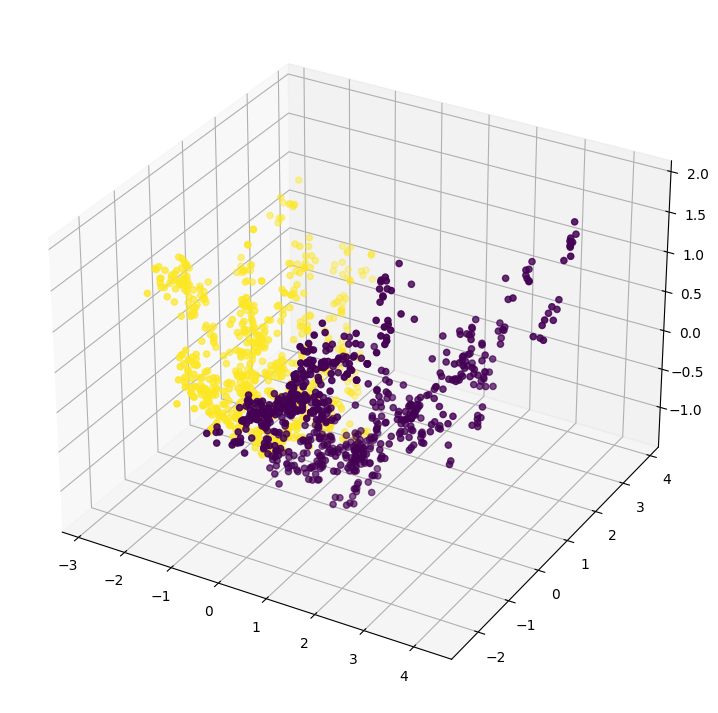

0.010995258562412695

In [17]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0], projection[:,1], projection[:,2], c=kmeans_labels)
plt.show()
normalized_mutual_info_score(kmeans_labels, y_range_change.flatten())

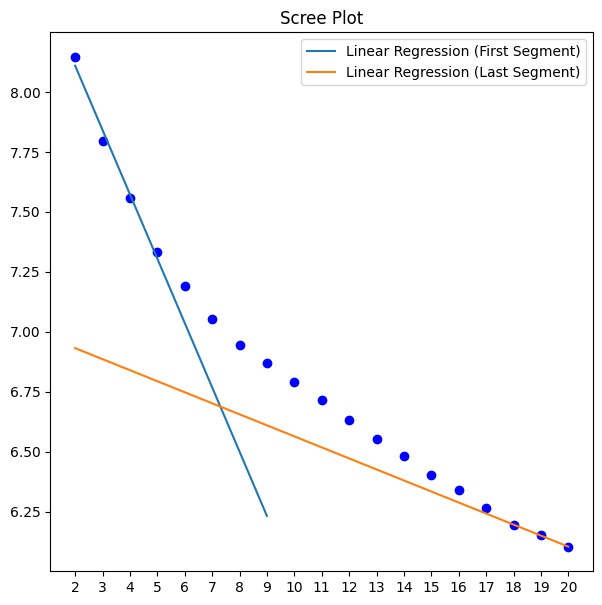

In [18]:
# Scree plot with linear regression lines for different segments to aid in determining the optimal number of clusters (k)

# Possible values for k in k-means
nk_base = np.arange(2, 21)

# Initialize an array to store the loss values for each k
loss = np.zeros(nk_base.shape[0])

# Iterate over each value of k and compute the k-means loss
for i, nk in enumerate(nk_base):
    kmeans = KMeans(n_clusters=nk, random_state=0, n_init=20).fit(X_scaled)
    loss[i] = kmeans.inertia_

# Fit linear regression models for the first four points and the last four points
reg_first_segment = LinearRegression().fit(nk_base[:4].reshape(-1, 1), np.log(loss[:4]))
reg_last_segment = LinearRegression().fit(nk_base[16:20].reshape(-1, 1), np.log(loss[16:20]))

# Predict values using the linear regression models
predicted_first_segment = reg_first_segment.predict(nk_base[:8].reshape(-1, 1))
predicted_last_segment = reg_last_segment.predict(nk_base.reshape(-1, 1))

# Create a scatter plot of k versus the log of the loss
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(nk_base, np.log(loss), c='b')

# Set x-axis ticks to the possible values for k
ax.set_xticks(nk_base)

# Set plot title
ax.set_title('Scree Plot')

# Plot linear regression lines for the first and last segments
ax.plot(nk_base[:8], predicted_first_segment[:8], label='Linear Regression (First Segment)')
ax.plot(nk_base, predicted_last_segment, label='Linear Regression (Last Segment)')

# Display the legend
ax.legend()

# Display the plot
plt.show()

#### t-SNE

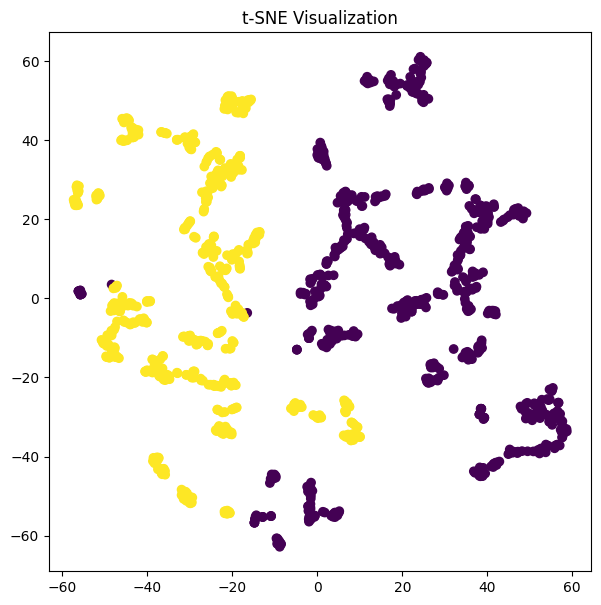

In [20]:
# Embed the data into 2D using t-SNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15, random_state=42).fit_transform(X_scaled)

# Create a scatter plot of the embedded data, colored by ground truth labels
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_scaled)

# Set plot title
ax.set_title('t-SNE Visualization')

# Display the plot
plt.show()

#### DBSCAN

In [235]:
# This piece of code means it will find the 50 nearest neighbors for each data point from which we can infer epsilon
neighbors = NearestNeighbors(n_neighbors=50)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

In [236]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

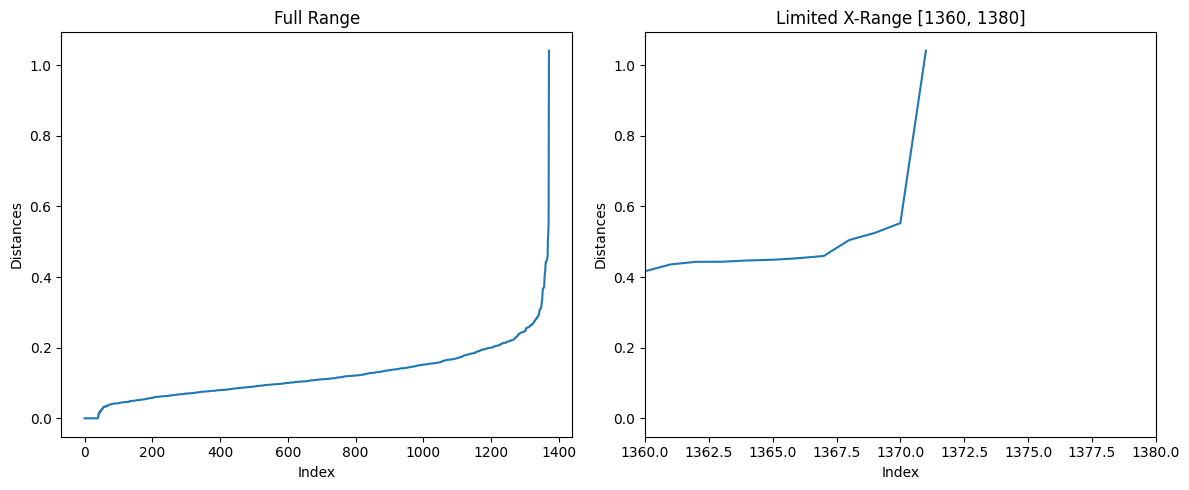

In [237]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First plot: Full range
axs[0].plot(distances)
axs[0].set_title("Full Range")
axs[0].set_xlabel("Index")
axs[0].set_ylabel("Distances")

# Second plot: Limited x-axis
axs[1].plot(distances)
axs[1].set_xlim(1360, 1380)
axs[1].set_title("Limited X-Range [1360, 1380]")
axs[1].set_xlabel("Index")
axs[1].set_ylabel("Distances")

# Show the plots
plt.tight_layout()
plt.show()

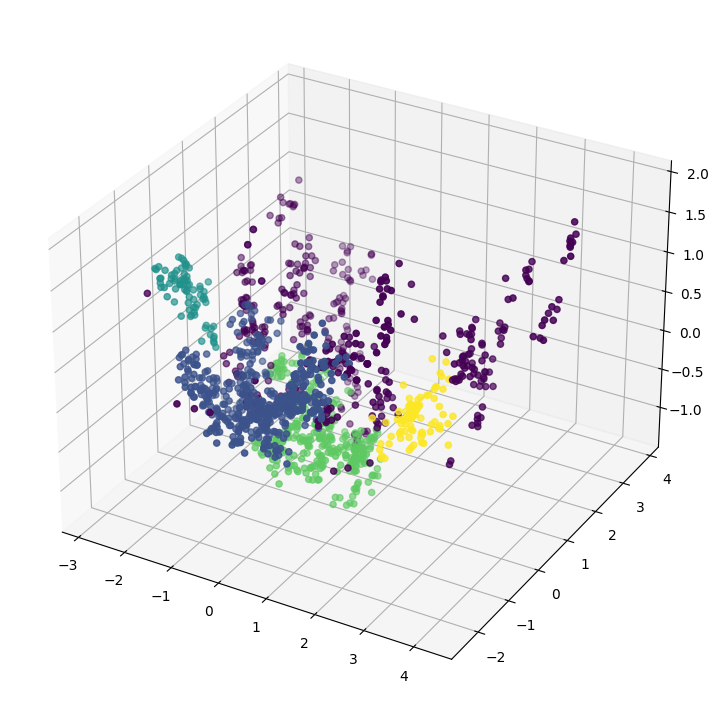

In [238]:
# Apply DBSCAN clustering algorithm to the scaled data
dbscan = DBSCAN(eps=0.6, min_samples=50).fit(X_scaled)

# Visualize the clusters in a 3D scatter plot using the first three Principal Components
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2], c=dbscan.labels_)

# Display the 3D plot
plt.show()

### 3. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN. 

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed. 

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     


In [239]:
# This line splits the dataset into training and test sets
X_train, X_test, train_y, test_y = train_test_split(X, y_scaled, test_size=0.728863, random_state=42)

In [240]:
# This line Ensures all features have a mean of 0 and variance of 1
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)

In [241]:
# Contruct the dataframes to be used later
combined_train = np.hstack((X_train_scaled, train_y))
data_scaled_train = pd.DataFrame(combined_train, columns=data.columns.tolist())

combined_test = np.hstack((X_test_scaled, test_y))
data_scaled_test = pd.DataFrame(combined_test, columns=data.columns.tolist())

full_data_scaled = pd.concat([data_scaled_train, data_scaled_test])

In [242]:
# Trasform from column to row
train_y = train_y.ravel()
test_y = test_y.ravel()

#### Logistic Regression

In [243]:
# Initialize model
log_reg = LogisticRegression()

# Train (fit) the model
log_reg.fit(X_train_scaled, train_y)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.977022977022977


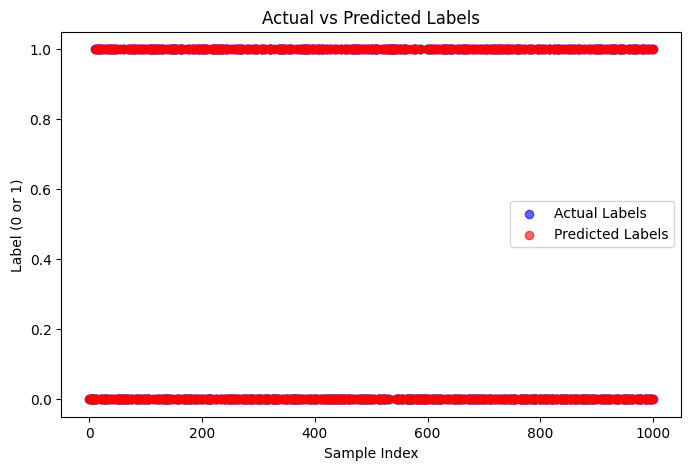

In [244]:
# Plot of the actual labels vs predicted labels (not very clear)
plt.figure(figsize=(8, 5))
plt.scatter(range(len(test_y)), test_y, color="blue", label="Actual Labels", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted Labels", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Label (0 or 1)")
plt.title("Actual vs Predicted Labels")
plt.legend()
plt.show()

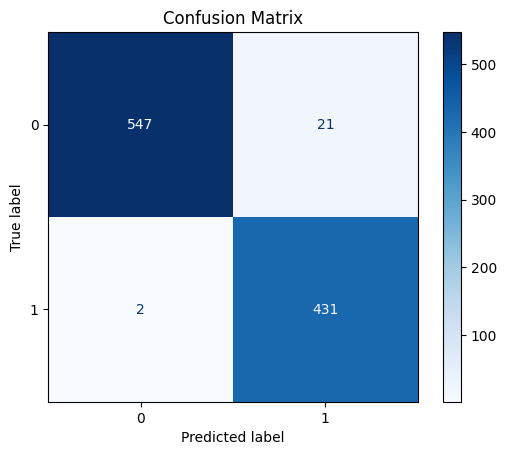

In [245]:
# Confusion matrix that shows how many are predicted correctly
cm = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [246]:
# Get feature weights (coefficients)
weights = log_reg.coef_  # Shape: (1, num_features)

# Get bias (intercept)
bias = log_reg.intercept_

print("Weights:", weights)
print("Bias (Intercept):", bias)

Weights: [[-3.85930556 -3.19055172 -3.00222753  0.19300842]]
Bias (Intercept): [-0.54602313]


In [247]:
original_weights = weights / scaler.scale_  # Convert back to original scale
original_bias = bias - np.sum(weights * scaler.mean_ / scaler.scale_)

print("Original Weights:", original_weights)
print("Original Bias:", original_bias)

Original Weights: [[-1.37383299 -0.5580583  -0.74401308  0.0938415 ]]
Original Bias: [1.88892023]


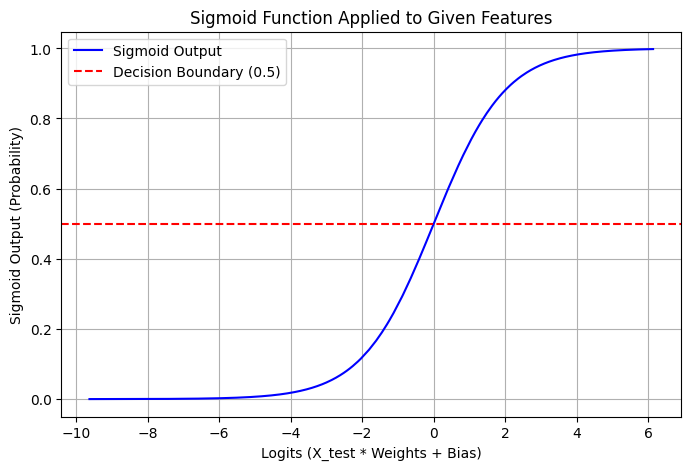

In [248]:
logits = np.dot(X_test, original_weights.flatten()) + original_bias

# Apply sigmoid function
probs = 1 / (1 + np.exp(-logits))

# Sort by logits
sorted_indices = np.argsort(logits)
sorted_logits = logits[sorted_indices]
sorted_probs = probs[sorted_indices]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_logits, sorted_probs, label="Sigmoid Output", color="blue")
plt.axhline(y=0.5, color='red', linestyle='dashed', label="Decision Boundary (0.5)")
plt.xlabel("Logits (X_test * Weights + Bias)")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("Sigmoid Function Applied to Given Features")
plt.legend()
plt.grid()
plt.show()

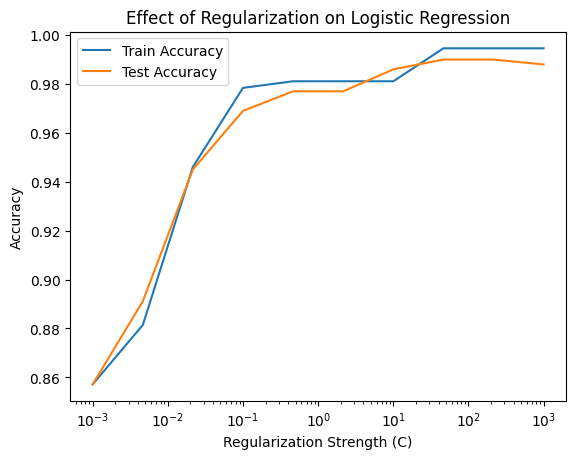

In [249]:
# Applying crossvalidation for λ
# Define different regularization types
penalties = ['l1', 'l2', 'elasticnet']
C_values = np.logspace(-3, 3, 10)  # Regularization strengths (0.001 to 1000)
l1_ratios = np.linspace(0.1, 0.9, 5)  # Dynamic L1 ratios for Elastic Net

# Initialize plot
fig, ax = plt.subplots(figsize=(8, 6))

for pen in penalties:
    train_accuracies = []
    test_accuracies = []

    for C in C_values:
        if pen == 'elasticnet':
            l1_acc_train = []
            l1_acc_test = []

            for l1_ratio in l1_ratios:
                log_reg = LogisticRegression(C=C, penalty=pen, solver='saga', l1_ratio=l1_ratio, max_iter=15000)
                log_reg.fit(X_train_scaled, train_y)
                l1_acc_train.append(log_reg.score(X_train_scaled, train_y))
                l1_acc_test.append(log_reg.score(X_test_scaled, test_y))
            
            # Store the average accuracy across all l1_ratios
            train_accuracies.append(np.mean(l1_acc_train))
            test_accuracies.append(np.mean(l1_acc_test))

        else:
            log_reg = LogisticRegression(C=C, penalty=pen, solver='liblinear', max_iter=15000)
            log_reg.fit(X_train_scaled, train_y)
            train_accuracies.append(log_reg.score(X_train_scaled, train_y))
            test_accuracies.append(log_reg.score(X_test_scaled, test_y))

    # Plot training and test accuracy
    ax.plot(C_values, train_accuracies, linestyle='--', label=f'Train Accuracy ({pen})')
    ax.plot(C_values, test_accuracies, label=f'Test Accuracy ({pen})')

ax.set_xscale('log')
ax.set_xlabel('Regularization Strength (C)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_title('Effect of L1, L2, and Elastic Net Regularization on Logistic Regression')
plt.show()

In [30]:
# Define different regularization types
penalties = ['l1', 'l2', 'elasticnet']
C_values = np.logspace(-3, 3, 10)  
l1_ratios = np.linspace(0.1, 0.9, 5)  

# Store best scores
best_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
best_params = {}

for pen in penalties:
    for C in C_values:
        if pen == 'elasticnet':
            for l1_ratio in l1_ratios:
                log_reg = LogisticRegression(C=C, penalty=pen, solver='saga', l1_ratio=l1_ratio, max_iter=15000)
                log_reg.fit(X_train_scaled, train_y)
                y_pred = log_reg.predict(X_test_scaled)

                # Compute metrics
                report = classification_report(test_y, y_pred, output_dict=True, zero_division=0)
                acc = report['accuracy']
                prec = report['macro avg']['precision']
                rec = report['macro avg']['recall']
                f1 = report['macro avg']['f1-score']

                # Update best metrics
                for metric, value in zip(['accuracy', 'precision', 'recall', 'f1'], [acc, prec, rec, f1]):
                    if value > best_metrics[metric]:
                        best_metrics[metric] = value
                        best_params[metric] = {'penalty': pen, 'C': C, 'l1_ratio': l1_ratio}

        else:
            log_reg = LogisticRegression(C=C, penalty=pen, solver='liblinear', max_iter=15000)
            log_reg.fit(X_train_scaled, train_y)
            y_pred = log_reg.predict(X_test_scaled)

            # Compute metrics
            report = classification_report(test_y, y_pred, output_dict=True, zero_division=0)
            acc = report['accuracy']
            prec = report['macro avg']['precision']
            rec = report['macro avg']['recall']
            f1 = report['macro avg']['f1-score']

            # Update best metrics
            for metric, value in zip(['accuracy', 'precision', 'recall', 'f1'], [acc, prec, rec, f1]):
                if value > best_metrics[metric]:
                    best_metrics[metric] = value
                    best_params[metric] = {'penalty': pen, 'C': C}

# Print the best values and parameters
for metric, value in best_metrics.items():
    print(f"Best {metric}: {value:.4f} (Params: {best_params[metric]})")

NameError: name 'X_train_scaled' is not defined

#### Decision Tree

In [250]:
# compute H(S)
def entropy(train_data, label, class_list):
    """
    Calculate the entropy of a dataset.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.

    Returns
    -------
    total_entr : float
        The entropy of the dataset.
    """
    # Get the total number of instances in the dataset
    total_row = train_data.shape[0]
    # Initialize the total entropy variable
    total_entr = 0

    # Iterate through each possible class in the label
    for c in class_list:
        # Count the number of points belonging to the current class
        total_class_count = train_data[train_data[label] == c].shape[0]

        # Check if there are instances of the class to avoid numerical errors
        if total_class_count > 0:
            # Calculate the entropy of the current class
            total_class_entr = - (total_class_count / total_row) * np.log2(total_class_count / total_row)
            # Add the entropy of the current class to the total entropy of the dataset
            total_entr += total_class_entr

    # Return the calculated total entropy of the dataset
    return total_entr

In [251]:
# compute H(S_j)
def feature_entropy(left_data, right_data, label, class_list):
    """
    Calculate the conditional entropy of a dataset split by a specific feature.

    Parameters
    ----------
    left_data : DataFrame
        Subset of the dataset where the feature has a specific value.
    right_data : DataFrame
        Subset of the dataset where the feature has another value.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.

    Returns
    -------
    ent : float
        The conditional entropy of the dataset split by the feature.
    """
    # Get the total number of points considered after the split
    row_count = left_data.shape[0] + right_data.shape[0]

    # Calculate the probabilities of the left and right subsets
    p_left = left_data.shape[0] / row_count
    p_right = right_data.shape[0] / row_count

    # Calculate the conditional entropy using the weighted average of entropies for left and right subsets
    ent = p_left * entropy(left_data, label, class_list) + p_right * entropy(right_data, label, class_list)

    # Return the calculated conditional entropy
    return ent

In [252]:
def split_dec_tree(feature_column, threshold):
    """
    Split the indices of data points based on a feature and a threshold.

    Parameters
    ----------
    feature_column : array-like
        The values of the feature for each data point.
    threshold : float
        The threshold value for splitting the data points.

    Returns
    -------
    left_rows : array-like
        Indices of data points where the feature value is less than or equal to the threshold.
    right_rows : array-like
        Indices of data points where the feature value is greater than the threshold.
    """
    # Find the indices of data points where the feature value is less than or equal to the threshold
    left_rows = np.argwhere(feature_column <= threshold).flatten()
    # Find the indices of data points where the feature value is greater than the threshold
    right_rows = np.argwhere(feature_column > threshold).flatten()

    # Return the indices for left and right subsets
    return left_rows, right_rows

In [253]:
def information_gain(data, feature_name, label, class_list, threshold):
    """
    Calculate the information gain after splitting the dataset based on a feature and a threshold.

    Parameters
    ----------
    data : DataFrame
        The dataset.
    feature_name : str
        The name of the feature for which information gain is calculated.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.
    threshold : float
        The threshold value for splitting the dataset.

    Returns
    -------
    feat_information_gain : float
        The information gain achieved by splitting the dataset based on the specified feature and threshold.
    """
    # Split the dataset into left and right subsets based on the feature and threshold
    left_rows, right_rows = split_dec_tree(data[feature_name].values, threshold)

    # Check if either subset is empty; if so, information gain is zero
    if len(left_rows) == 0 or len(right_rows) == 0:
        return 0

    # Calculate the entropy of the split dataset
    feat_entropy = feature_entropy(data.iloc[left_rows], data.iloc[right_rows], label, class_list)

    return feat_entropy

In [254]:
def get_split_thresholds(feature_column, n_thresholds):
    """
    Generate candidate split thresholds for a given feature column.

    Parameters
    ----------
    feature_column : array-like
        The values of the feature for each data point.
    n_thresholds : int
        The number of thresholds to generate.

    Returns
    -------
    thresholds : list of float
        List of candidate split thresholds for the feature column.
    """
    # Extract the values of the feature column
    feature_column = feature_column.values
    # Get the total number of data points
    n_data = len(feature_column)

    # Sort the feature column in ascending order
    sorted_column = np.sort(feature_column)

    # Check if there is more than one data point
    if len(feature_column) > 1:
        # Split the sorted feature column into n_thresholds + 1 partitions
        partitioned_array = np.array_split(sorted_column, n_thresholds + 1)

        # Calculate the midpoint between consecutive partitions as candidate thresholds
        thresholds = [(partitioned_array[i][-1] + partitioned_array[i + 1][0]) / 2 for i in range(len(partitioned_array) - 1)]
    else:
        # If there is only one data point, use it as the threshold
        thresholds = [feature_column[0]]

    # Return the list of candidate split thresholds
    return thresholds

In [255]:
def most_informative_feature(train_data, label, class_list, n_thresholds):
    """
    Find the most informative feature and its corresponding threshold for splitting the dataset.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.
    n_thresholds : int
        The number of thresholds to generate for each feature.

    Returns
    -------
    min_entropy_feature : str
        The name of the most informative feature.
    min_entropy_threshold : float
        The corresponding threshold for splitting the dataset based on the most informative feature.
    """
    # Get the list of features excluding the label
    feature_list = train_data.columns.drop(label)

    # Initialize variables to store the minimum entropy and corresponding feature and threshold
    min_entropy = float('inf')
    min_entropy_feature = None
    min_entropy_threshold = None

    # Iterate over each feature in the feature list
    for feature in feature_list:
        # Generate candidate split thresholds for the current feature
        thresholds = get_split_thresholds(train_data[feature], n_thresholds)

        # Iterate over each threshold
        for t in thresholds:
            # Calculate information gain for the current feature and threshold
            info_gain = information_gain(train_data, feature, label, class_list, t)

            # Check if the calculated information gain is less than the current minimum entropy
            if info_gain < min_entropy:
                # Update the minimum entropy and corresponding feature and threshold
                min_entropy = info_gain
                min_entropy_feature = feature
                min_entropy_threshold = t

    # Return the most informative feature and its corresponding threshold
    return min_entropy_feature, min_entropy_threshold

In [256]:
def is_leaf(train_data, label):
    """
    Check if a node in a decision tree is a leaf node.

    Parameters
    ----------
    train_data : DataFrame
        The dataset associated with the current node.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    bool
        True if the node is a leaf node (contains only one class), False otherwise.
    """
    # Get the unique classes in the current node
    classes_in_node = np.unique(train_data[label])

    # Check if there is only one class in the node
    if len(classes_in_node) == 1:
        # If there is only one class, the node is a leaf node
        return True
    else:
        # If there is more than one class, the node is not a leaf node
        return False

In [257]:
def leaf_class(train_data, label):
    """
    Determine the class of a leaf node in a decision tree.

    Parameters
    ----------
    train_data : DataFrame
        The dataset associated with the leaf node.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    leaf_class : str
        The class label assigned to the leaf node.
    """
    # Get the unique classes and their counts in the current leaf node
    class_list, count_class = np.unique(train_data[label], return_counts=True)

    # Find the index of the class with the highest count (most frequent class)
    idx = count_class.argmax()

    # Return the class label associated with the most frequent class in the leaf node
    return class_list[idx]

In [258]:
def make_tree(train_data, label, class_list, n_thresholds, cur_depth, min_samples, max_depth):
    """
    Recursively build a decision tree.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset associated with the current node.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.
    n_thresholds : int
        The number of thresholds to generate for each feature.
    cur_depth : int
        The current depth of the decision tree.
    min_samples : int
        The minimum number of samples required to split a node.
    max_depth : int
        The maximum depth of the decision tree.

    Returns
    -------
    tree : dict or str
        The constructed decision tree represented as a nested dictionary. If a leaf node, returns the class label.
    """
    # Check stopping conditions for creating a leaf node
    if is_leaf(train_data, label) or cur_depth >= max_depth or len(train_data) <= min_samples:
        return leaf_class(train_data, label)
    else:
        # Increment the current depth for the next level of recursion
        cur_depth += 1

        # Find the most informative feature and its corresponding threshold for splitting
        split_feature, split_threshold = most_informative_feature(train_data, label, class_list, n_thresholds)

        # Split the dataset into left and right subsets based on the feature and threshold
        left_rows, right_rows = split_dec_tree(train_data[split_feature].values, split_threshold)

        # Check if either subset is empty; if so, create a leaf node
        if len(left_rows) == 0 or len(right_rows) == 0:
            return leaf_class(train_data, label)
        else:
            # Build the subtree
            split_condition = "{} <= {}".format(split_feature, split_threshold)
            sub_tree = {split_condition: []}

            # Recursive calls for the left and right branches
            left_branch = make_tree(train_data.iloc[left_rows], label, class_list, n_thresholds, cur_depth, min_samples, max_depth)
            right_branch = make_tree(train_data.iloc[right_rows], label, class_list, n_thresholds, cur_depth, min_samples, max_depth)

            # Check if both branches result in the same leaf class; if so, make the subtree a leaf
            if left_branch == right_branch:
                sub_tree = left_branch
            else:
                # Grow the tree by adding left and right branches to the split condition
                sub_tree[split_condition].append(left_branch)
                sub_tree[split_condition].append(right_branch)

            return sub_tree

In [259]:
def id3(train_data_m, label, n_thresholds=1, min_samples=4, max_depth=5):
    """
    Build a decision tree using the ID3 algorithm.

    Parameters
    ----------
    train_data_m : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.
    n_thresholds : int, optional
        The number of thresholds to generate for each feature.
    min_samples : int, optional
        The minimum number of samples required to split a node.
    max_depth : int, optional
        The maximum depth of the decision tree.

    Returns
    -------
    tree : dict or str
        The constructed decision tree represented as a nested dictionary. If a leaf node, returns the class label.
    """
    # Create a copy of the training dataset
    train_data = train_data_m.copy()

    # Get the unique classes of the label
    class_list = train_data[label].unique()

    # Start the recursion by calling the make_tree function
    tree = make_tree(train_data, label, class_list, n_thresholds, 0, min_samples, max_depth)

    # Return the constructed decision tree
    return tree

In [260]:
def predict_dec_tree(test_point, tree):
    """
    Predict the class label for a given test point using a decision tree.

    Parameters
    ----------
    test_point : Series
        The test point for which the class label is predicted.
    tree : dict or str
        The decision tree used for prediction.

    Returns
    -------
    prediction : str
        The predicted class label for the test point.
    """
    # Base case: if the tree is a leaf node (a class label)
    if not isinstance(tree, dict):
        return tree

    # Recursive case: traverse the tree based on feature values
    question = list(tree.keys())[0]
    attribute, value = question.split(" <= ")

    # Check the condition and follow the appropriate branch
    if test_point[attribute] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # Recursive call on the selected branch
    return predict_dec_tree(test_point, answer)

In [261]:
def evaluate_dec_tree(tree, test_data, label):
    """
    Evaluate the accuracy of a decision tree on a test dataset.

    Parameters
    ----------
    tree : dict or str
        The decision tree to be evaluated.
    test_data : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    accuracy : float
        The accuracy of the decision tree on the test dataset.
    """
    correct_predict = 0
    wrong_predict = 0

    # Iterate over each row in the test dataset
    for index in tqdm(range(len(test_data.index))):
        # Predict the class label for the current test point
        result = predict_dec_tree(test_data.iloc[index], tree)

        # Check if the predicted value matches the expected value
        if result == test_data[label].iloc[index]:
            correct_predict += 1  # Increase correct count
        else:
            wrong_predict += 1  # Increase incorrect count

    # Calculate and return the accuracy
    accuracy = correct_predict / (correct_predict + wrong_predict)
    return accuracy

In [266]:
def cross_validate_id3(full_data, label, k=5, n_thresholds=1, min_samples=4, max_depth=5):
    """
    Perform k-fold cross-validation for the ID3 decision tree algorithm.

    Parameters
    ----------
    full_data : DataFrame
        The full dataset containing feature columns and the target label.
    label : str
        The column name representing the class labels.
    k : int, optional
        Number of folds for cross-validation (default is 5).
    n_thresholds : int, optional
        The number of thresholds to generate for each feature.
    min_samples : int, optional
        The minimum number of samples required to split a node.
    max_depth : int, optional
        The maximum depth of the decision tree.

    Returns
    -------
    best_tree : dict or str
        The best-performing decision tree model.
    best_accuracy : float
        The highest accuracy achieved across the k-folds.
    """

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    best_tree = None
    best_accuracy = 0

    for train_index, test_index in kf.split(full_data):
        train_data = full_data.iloc[train_index]
        test_data = full_data.iloc[test_index]

        # Train the decision tree using ID3
        tree = id3(train_data, label, n_thresholds, min_samples, max_depth)

        # Evaluate the decision tree
        accuracy = evaluate_dec_tree(tree, test_data, label)
        accuracies.append(accuracy)

        # Save the best tree model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_tree = tree

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Best Accuracy: {best_accuracy:.4f}")

    return best_tree, best_accuracy


In [264]:
tree = id3(data_scaled_train, 'targets')
evaluate_dec_tree(tree, data_scaled_test, 'targets')

100%|██████████| 1001/1001 [00:00<00:00, 27054.97it/s]


0.9470529470529471

In [267]:
cross_validate_id3(full_data_scaled, 'targets', k=5, n_thresholds=1, min_samples=4, max_depth=5)

100%|██████████| 274/274 [00:00<00:00, 24901.72it/s]

Mean Accuracy: 0.9410
Best Accuracy: 0.9599


({'variance <= 0.08273621973401221': [{'skewness <= -0.23045036666240415': [1.0,
     {'skewness <= 0.3692719849864876': [1.0,
       {'variance <= -0.7788796956067738': [{'skewness <= 1.0833843759839528': [1.0,
           0.0]},
         0.0]}]}]},
   {'variance <= 0.9058636505756243': [{'curtosis <= -0.36535412072856777': [{'skewness <= 0.8130177778860208': [1.0,
         0.0]},
       0.0]},
     0.0]}]},
 0.9598540145985401)

#### Gaussian Naive Bayesian

In [268]:
def prior_gauss_bayes(train_data, label):
    """
    Calculate the log prior probabilities for each class in the dataset.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    priors : array-like
        The log prior probabilities for each class.
    """
    # Calculate the prior probabilities for each class
    priors = train_data.groupby(by=label).apply(lambda x: len(x) / len(train_data))

    # Return the log of the prior probabilities as an array
    return np.log(priors).values


def mean_variance(train_data, label):
    """
    Calculate the mean and variance for each feature in the dataset, grouped by class.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    mean : array-like
        The mean values for each feature and class.
    variance : array-like
        The variance values for each feature and class.
    """
    # Calculate the mean values for each feature and class
    mean = train_data.groupby(by=label).apply(lambda x: x.mean(axis=0))

    # Calculate the variance values for each feature and class
    variance = train_data.groupby(by=label).apply(lambda x: x.var(axis=0))

    # Return the mean and variance as arrays
    return (mean.values, variance.values + 1e-9)


def gaussian_density(mean, variance, point):
    """
    Calculate the Gaussian probability density for a given point.

    Parameters
    ----------
    mean : array-like
        The mean values for each feature and class.
    variance : array-like
        The variance values for each feature and class.
    point : array-like
        The values of the features for a given point.

    Returns
    -------
    density : array-like
        The Gaussian probability density for the given point.
    """
    # Calculate the Gaussian probability density for each feature
    d = (1 / np.sqrt(2*np.pi*variance)) * np.exp((-(point - mean)**2) / (2*variance))

    # Return the density as an array
    return d


def train_gaussian_naive_bayes(train_data, label):
    """
    Train a Gaussian Naive Bayes classifier.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    model : dict
        A dictionary containing the parameters of the trained Gaussian Naive Bayes model.
    """
    # Calculate the mean and variance for each feature and class
    mean, variance = mean_variance(train_data, label)

    # Calculate the log prior probabilities for each class
    priors = prior_gauss_bayes(train_data, label)

    # Get unique class labels and their count
    unique_labels = train_data[label].unique()
    n_labels = len(unique_labels)

    # Construct and return the Gaussian Naive Bayes model
    return {'n_labels': n_labels, 'unique_labels': unique_labels, 'n_classes': n_labels, 'mean': mean,
            'variance': variance, 'prior': priors}

In [269]:
def posterior_gauss_bayes(point, mean, variance, class_list, n_classes, n_feat):
    """
    Calculate the log posterior probabilities for each class given a data point.

    Parameters
    ----------
    point : array-like
        The values of the features for a given data point.
    mean : array-like
        The mean values for each feature and class.
    variance : array-like
        The variance values for each feature and class.
    class_list : array-like
        The unique class labels.
    n_classes : int
        The number of classes.
    n_feat : int
        The number of features.

    Returns
    -------
    posteriors : array-like
        The log posterior probabilities for each class.
    """
    posteriors = []
    for i in range(n_classes):
        posterior = 0
        for j in range(n_feat):
            posterior += np.log(gaussian_density(mean[i][j], variance[i][j], point[j]))
        posteriors.append(posterior)
    return posteriors


def predict_gauss_bayes(test_data, label, gaus_bayes):
    """
    Predict the class labels for a given test dataset using a trained Gaussian Naive Bayes model.

    Parameters
    ----------
    test_data : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.
    gaus_bayes : dict
        A dictionary containing the parameters of the trained Gaussian Naive Bayes model.

    Returns
    -------
    predictions : array-like
        The predicted class labels for the test dataset.
    """
    predictions = []
    n_feat = len(test_data.columns) - 1
    for i in range(len(test_data)):
        pr = gaus_bayes['prior']
        post = posterior_gauss_bayes(test_data.iloc[i, :-1], gaus_bayes['mean'], gaus_bayes['variance'],
                         gaus_bayes['unique_labels'], gaus_bayes['n_classes'], n_feat)
        prob = pr + post
        max_prob_class_idx = np.argmax(prob)
        predictions.append(gaus_bayes['unique_labels'][max_prob_class_idx])
    return predictions


def evaluate_gaus_naive_bayes(test_data, label, gaus_bayes):
    """
    Evaluate the accuracy of a Gaussian Naive Bayes model on a test dataset.

    Parameters
    ----------
    test_data : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.
    gaus_bayes : dict
        A dictionary containing the parameters of the trained Gaussian Naive Bayes model.

    Returns
    -------
    accuracy : float
        The accuracy of the Gaussian Naive Bayes model on the test dataset.
    """
    gaus_pred = predict_gauss_bayes(test_data, label, gaus_bayes)
    correct_predict = 0
    wrong_predict = 0
    for index in tqdm(range(len(test_data.index))):
        if gaus_pred[index] == test_data[label].iloc[index]:
            correct_predict += 1
        else:
            wrong_predict += 1
    accuracy = correct_predict / (correct_predict + wrong_predict)
    return accuracy

In [271]:
def cross_validate_naive_bayes(full_data, label, k=5):
    """
    Perform k-fold cross-validation for Gaussian Naïve Bayes using the existing training and evaluation functions.

    Parameters
    ----------
    data : DataFrame
        The full dataset containing feature columns and the target label.
    label : str
        The column name representing the class labels.
    k : int, optional
        Number of folds for cross-validation (default is 5).

    Returns
    -------
    best_model : dict
        The best-performing Naïve Bayes model.
    best_accuracy : float
        The highest accuracy achieved.
    """

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    best_model = None
    best_accuracy = 0

    for train_index, test_index in kf.split(full_data):
        train_data = full_data.iloc[train_index]
        test_data = full_data.iloc[test_index]

        # Train the Gaussian Naïve Bayes model
        gaus_bayes = train_gaussian_naive_bayes(train_data, label)

        # Evaluate the model
        accuracy = evaluate_gaus_naive_bayes(test_data, label, gaus_bayes)
        accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = gaus_bayes

    print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
    print(f"Best Accuracy: {best_accuracy:.4f}")

    return best_model, best_accuracy

In [ ]:
gaus_bayes = train_gaussian_naive_bayes(data_scaled_train, 'targets')
evaluate_gaus_naive_bayes(data_scaled_test, 'targets', gaus_bayes)

In [272]:
full_data = pd.concat([data_scaled_test,data_scaled_train])
cross_validate_naive_bayes(full_data, 'targets', 5)

C:\Users\mutua\AppData\Local\Temp\ipykernel_9452\1671304593.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mean = train_data.groupby(by=label).apply(lambda x: x.mean(axis=0))
C:\Users\mutua\AppData\Local\Temp\ipykernel_9452\1671304593.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  variance = train_data.groupby(by=label).apply(lambda x: x.var(axis=0))
C:\Users\mutua\AppData\Local\Temp\ipykernel_9

Mean Accuracy: 0.8418
Best Accuracy: 0.8613


({'n_labels': 2,
  'unique_labels': array([0., 1.]),
  'n_classes': 2,
  'mean': array([[ 0.76551145,  0.47020926, -0.23106497, -0.02594049,  0.        ],
         [-0.68732442, -0.41757302,  0.05850812, -0.10073672,  1.        ]]),
  'variance': array([[5.11752867e-01, 8.10814207e-01, 6.25844074e-01, 1.02122284e+00,
          1.00000000e-09],
         [4.41470429e-01, 8.68014308e-01, 1.72610603e+00, 9.98693117e-01,
          1.00000000e-09]]),
  'prior': array([-0.56509525, -0.8400383 ])},
 0.8613138686131386)

#### K-NN

In [273]:
def distance_knn(point_one, point_two, dist, p):
    """
    Calculate the Euclidean distance between two points.

    Parameters
    ----------
    point_one : array-like
        Coordinates of the first point.
    point_two : array-like
        Coordinates of the second point.
    dist: str
        Allow to choose between Euclidean or Minkowski distance.
    p: int
        Order of the norm, only used with Minkowski distance.

    Returns
    -------
    float
        Euclidean or Minkowski distance between the two points.
    """
    if dist == 'euclidean':
        return euclidean(point_one, point_two)
    else:
        return minkowski(point_one, point_two, p=p)


def get_neighbors_knn(train_set, test_point, label_col, n_neighbors, dist, p):
    """
    Get the nearest neighbors of a test point in the training set.

    Parameters
    ----------
    train_set : array-like
        The training set containing data points.
    test_point : array-like
        The test point for which neighbors are to be found.
    label_col : array-like
        The labels corresponding to the training set.
    n_neighbors : int
        The number of neighbors to retrieve.
    dist: str
        Allow to choose between Euclidean or Minkowski distance.
    p: int
        Order of the norm, only used with Minkowski distance.

    Returns
    -------
    ordered_train : array-like
        The nearest neighbors in the training set.
    ordered_label : array-like
        The corresponding labels of the nearest neighbors.
    """
    # Calculate distances between the test point and all points in the training set
    dist = np.array([distance_knn(train_point, test_point, dist, p) for train_point in train_set])
    # Get indices that would sort the distances in ascending order
    idx_dist = dist.argsort()
    # Order the training set and labels based on the sorted distances
    ordered_train = train_set[idx_dist, :]
    ordered_label = label_col[idx_dist]
    # Return the top n_neighbors neighbors and their labels
    return ordered_train[:n_neighbors], ordered_label[:n_neighbors]

def predict_knn(train_set, test_point, labels, n_neighbors, dist, p):
    """
    Predict the label of a test point using k-nearest neighbors.

    Parameters
    ----------
    train_set : array-like
        The training set containing data points.
    test_point : array-like
        The test point for which the label is to be predicted.
    labels : array-like
        The labels corresponding to the training set.
    n_neighbors : int
        The number of neighbors to consider for the prediction.
    dist: str
        Allow to choose between Euclidean or Minkowski distance.
    p: int
        Order of the norm, only used with Minkowski distance.

    Returns
    -------
    predicted_label : array-like
        The predicted label for the test point.
    """
    # Get the nearest neighbors and their labels
    neigh, neigh_label = get_neighbors_knn(train_set, test_point, labels, n_neighbors, dist, p)
    # Count occurrences of each label among the neighbors
    values, counts = np.unique(neigh_label, return_counts=True)
    # Find the label with the highest count (majority class)
    idx = np.argmax(counts)
    # Return the predicted label
    return values[idx]

def evaluate_knn(train_set, test_set, label, n_neighbors=2, dist='Euclidean', p=2):
    """
    Evaluate the accuracy of k-nearest neighbors algorithm on a test set.

    Parameters
    ----------
    train_set : DataFrame
        The training dataset.
    test_set : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.
    n_neighbors : int, optional
        The number of neighbors to consider for the prediction. Default is 2.
    dist: str
        Allow to choose between Euclidean or Minkowski distance.
    p: int
        Order of the norm, only used with Minkowski distance.

    Returns
    -------
    accuracy : float
        The accuracy of the k-nearest neighbors algorithm on the test set.
    """
    # Initialize counters for correct and incorrect predictions
    correct_predict = 0
    wrong_predict = 0
    # Extract labels and features from the training and test sets
    
    train_labels = train_set[label].values
    train_set = train_set.drop(label, axis=1)
    
    test_labels = test_set[label].values
    test_set = test_set.drop(label, axis=1)
    # Iterate through each row in the test dataset
    for index in tqdm(range(len(test_set.index))):
        # Predict the class label for the current test row
        result = predict_knn(train_set.values, test_set.iloc[index].values, train_labels, n_neighbors, dist, p)
        # Check if the predicted value matches the actual value
        if result == test_labels[index]:
            # Increase the correct prediction count
            correct_predict += 1
        else:
            # Increase the incorrect prediction count
            wrong_predict += 1

    # Calculate and return the accuracy
    accuracy = correct_predict / (correct_predict + wrong_predict)
    return accuracy

In [ ]:
knn_accuracy = evaluate_knn(data_scaled_train, data_scaled_test, 'targets', n_neighbors=5)
knn_accuracy

In [276]:
# Define hyperparameters to test
k_values = [1, 3, 5, 7, 9]
distance_metrics = ['euclidean', 'minkowski']
p_values = [1, 2]

# Number of folds for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Perform cross-validation for each combination of hyperparameters
for k in k_values:
    for dist in distance_metrics:
        for p in p_values:
            accuracies = [
                evaluate_knn(
                    full_data.iloc[train_idx],
                    full_data.iloc[val_idx],
                    label='targets',
                    n_neighbors=k,
                    dist=dist,
                    p=p
                )
                for train_idx, val_idx in kf.split(full_data)
            ]
            
            # Store average accuracy for the current hyperparameters
            results.append((k, dist, p, np.mean(accuracies)))

# Find best hyperparameter combination
best_params = max(results, key=lambda x: x[3])

# Print best parameters
print(f"Best Hyperparameters: k={best_params[0]}, distance={best_params[1]}, p={best_params[2]}")
print(f"Best Cross-Validation Accuracy: {best_params[3]:.4f}")

100%|██████████| 274/274 [00:01<00:00, 183.36it/s]

Best Hyperparameters: k=1, distance=minkowski, p=1
Best Cross-Validation Accuracy: 0.9985


In [281]:
def evaluate_model(model, test_data, label, model_type="naive_bayes"):
    """
    Evaluate a trained model on the test set using accuracy, precision, recall, and F1-score.

    Parameters
    ----------
    model : dict or None
        The trained model (Decision Tree or Naïve Bayes). Not required for KNN.
    test_data : DataFrame
        The test dataset.
    label : str
        The column name representing the class labels.
    model_type : str
        Type of model ("naive_bayes", "decision_tree", "knn").

    Returns
    -------
    None (Prints the evaluation results).
    """

    if model_type == "naive_bayes":
        # Predict labels using Gaussian Naïve Bayes
        predictions = predict_gauss_bayes(test_data, label, model)

    elif model_type == "decision_tree":
        # Predict labels using Decision Tree
        predictions = [predict_dec_tree(row, model) for _, row in test_data.iterrows()]

    elif model_type == "knn":
        # Extract labels and features
        train_labels = data_scaled_train[label].values
        train_features = data_scaled_train.drop(label, axis=1).values
        test_labels = test_data[label].values
        test_features = test_data.drop(label, axis=1).values

        # Predict labels for test set using KNN
        predictions = [
            predict_knn(train_features, test_features[i], train_labels, n_neighbors=1, dist='minkowski', p=1)
            for i in range(len(test_features))
        ]

    # True labels
    y_true = test_data[label].values

    # Print classification report
    print(f"Evaluation for {model_type.upper()}:")
    print(classification_report(y_true, predictions, digits=4))
    print("-" * 50)


# Train models
nb_model = train_gaussian_naive_bayes(data_scaled_train, 'targets')
dt_model = id3(data_scaled_train, 'targets')

# Evaluate each model
evaluate_model(nb_model, data_scaled_test, 'targets', model_type="naive_bayes")
evaluate_model(dt_model, data_scaled_test, 'targets', model_type="decision_tree")
evaluate_model(None, data_scaled_test, 'targets', model_type="knn")

C:\Users\mutua\AppData\Local\Temp\ipykernel_9452\1671304593.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mean = train_data.groupby(by=label).apply(lambda x: x.mean(axis=0))
C:\Users\mutua\AppData\Local\Temp\ipykernel_9452\1671304593.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  variance = train_data.groupby(by=label).apply(lambda x: x.var(axis=0))
C:\Users\mutua\AppData\Local\Temp\ipykernel_9

Evaluation for NAIVE_BAYES:
              precision    recall  f1-score   support

         0.0     0.8486    0.8785    0.8633       568
         1.0     0.8329    0.7945    0.8132       433

    accuracy                         0.8422      1001
   macro avg     0.8408    0.8365    0.8383      1001
weighted avg     0.8418    0.8422    0.8417      1001

--------------------------------------------------
Evaluation for DECISION_TREE:
              precision    recall  f1-score   support

         0.0     0.9813    0.9243    0.9519       568
         1.0     0.9077    0.9769    0.9410       433

    accuracy                         0.9471      1001
   macro avg     0.9445    0.9506    0.9465      1001
weighted avg     0.9495    0.9471    0.9472      1001

--------------------------------------------------
Evaluation for KNN:
              precision    recall  f1-score   support

         0.0     1.0000    0.9947    0.9974       568
         1.0     0.9931    1.0000    0.9965       433

  